In [2]:
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from matplotlib import pyplot as plt

In [3]:
confirmed = np.array([
    45,
    62,
    121,
    198,
    291,
    440,
    571,
    830,
    1287,
    1975,
    2744,
    4515,
    5974,
    7711,
    9692,
    11791,
    14380,
    17205,
    20438,
    24324,
    28018,
    31161,
    34546,
    37198,
])

## Exponential function with ordinary least squares.

In [5]:
x = np.arange(len(confirmed))
x = add_constant(x)

In [15]:
model = OLS(np.log(confirmed), x)

In [16]:
result = model.fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     504.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.15e-16
Time:                        17:01:01   Log-Likelihood:                -13.754
No. Observations:                  24   AIC:                             31.51
Df Residuals:                      22   BIC:                             33.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5440      0.177     25.610      0.000       4.176       4.912
x1             0.2970      0.013     22.471      0.000       0.270       0.324
==============================================================================
Omnibus:                        1.961   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.551
Skew:                          -0.459   Prob(JB):                        0.460
Kurtosis:                       2.159   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

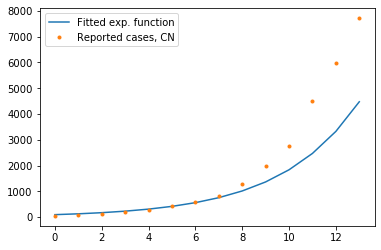

In [18]:
plt.plot(
    np.exp(result.predict(x[:14])),
    label="Fitted exp. function"      
)
plt.plot(confirmed[:14], ".", label="Reported cases, CN")
plt.legend()
plt.show()

In [13]:
world_population = 7763252653
days = 0
infected = confirmed[14]
while infected < world_population:
    days += 1
    infected = np.exp(result.predict([1, 13 + days]))[0]
print(f"Number of days until whole world is infected: {days}")

Number of days until whole world is infected: 35


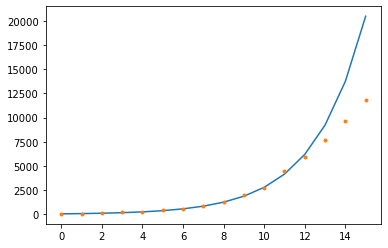

In [14]:
plt.plot(np.exp(result.predict(x[:16])))
plt.plot(confirmed[:16], ".")
plt.show()

## Logistic function fit

\begin{equation}
    f(x; a, b, c, d) = \frac{a}{1 + \exp({-c (x-d)})} + b
\end{equation}

In [22]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
logistic_function = lambda x, a, b, c, d: \
    a / (1 + np.exp(-c * (x - d))) + b

In [24]:
confirmed = np.array(confirmed)
x = x[:, 1]

In [26]:
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x, confirmed)

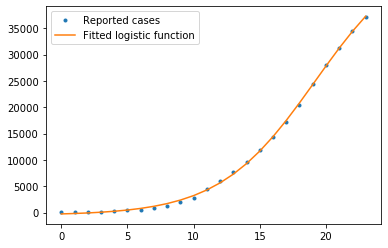

In [27]:
plt.plot(x, confirmed, ".", label="Reported cases")
confirmed_pred = logistic_function(x, a_, b_, c_, d_)
plt.plot(x, confirmed_pred, label="Fitted logistic function")
plt.legend()
plt.show()

In [28]:
r2_score(confirmed, confirmed_pred)

0.999500185228235

In [34]:
confirmed_now = confirmed[-1]
confirmed_then = confirmed[-2]
days = 0
now = x[-1]
while confirmed_now - confirmed_then > 10:
    days += 1
    confirmed_then = confirmed_now
    confirmed_now = logistic_function(
        now + days,
        a_,
        b_,
        c_,
        d_,
    )
print(f"In {days} days the number of infected people will plateau at {int(confirmed_now)}")

In 23 days the number of infected people will plateau at 50430


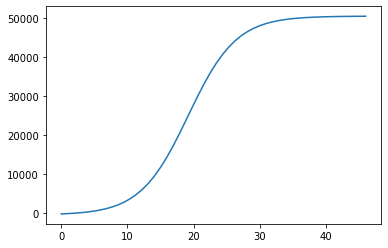

In [36]:
x_ = np.linspace(0, now + days)
plt.plot(
    x_,
    logistic_function(x_, a_, b_, c_, d_)
)
plt.show()